In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

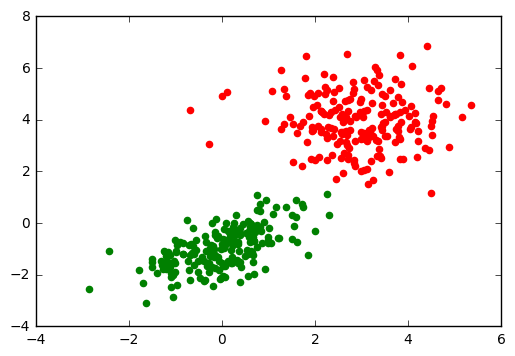

In [3]:
mean_01 = np.array([3.0, 4.0])
mean_02 = np.array([0.0, -1.0])

cov_01 = np.array([[1.0, 0.0],[0.0, 1.0]])
cov_02 = np.array([[0.75, 0.4], [0.4, 0.6]])

data_01=np.random.multivariate_normal(mean_01,cov_01,200)
data_02=np.random.multivariate_normal(mean_02,cov_02,200)

plt.figure(0)
plt.scatter(data_01[:,0],data_01[:,1],color='red')
plt.scatter(data_02[:,0],data_02[:,1],color='green')
plt.show()

In [5]:
label=np.zeros((400,))
label[200:]=1.0

data_x=np.zeros((400,2))
data_x[:200,:]=data_01
data_x[200:,:]=data_02

std_x = (data_x-data_x.mean(axis=0))/(data_x.std(axis=0)+1e-3)

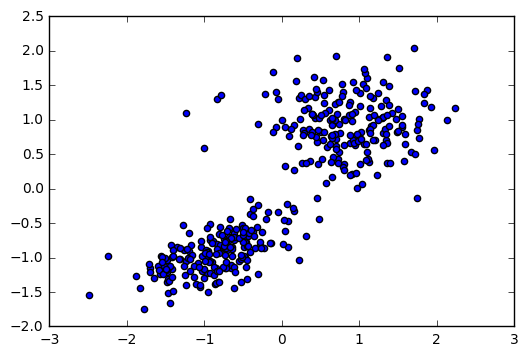

In [6]:
plt.figure(0)
plt.scatter(std_x[:,0],std_x[:,1])
plt.show()

In [16]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

q=np.array([0.0,0.0])

def knn(X_train,q,Y_train,k):
    
    val=[]
    for ix in range(X_train.shape[0]):
        m=[dist(q,X_train[ix,:]),Y_train[ix]]
        val.append(m)
    val=sorted(val,key=lambda x:x[0])
    pred=np.asarray(val[:k])
    print pred
    pred=np.unique(pred[:,1],return_counts=True)
    print pred
    pred_count=pred[1].argmax()
    return pred_count

res=knn(std_x,q,label,k=5)
print res
    

[[ 0.23557736  1.        ]
 [ 0.31199741  0.        ]
 [ 0.31853897  1.        ]
 [ 0.33450188  0.        ]
 [ 0.33541933  1.        ]]
(array([ 0.,  1.]), array([2, 3], dtype=int64))
1
